## Gather Data:
- Import relevant libraries
- Read in data from CSV

In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline

print("All libraries have been imported successfully")

All libraries have been imported successfully


In [2]:
# Copy in NCDB_1999_to_2014 datatset
df = pd.read_csv("./data/NCDB_1999_to_2014.csv")
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (1,2,5,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,02,34,UU,1,5,...,01,06,1990,01,M,41,11,1,UU,1
1,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,01,M,19,11,1,UU,1
2,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,08,2,01,01,UU,5,3,...,01,01,1986,01,M,46,11,1,UU,1
4,1999,1,1,08,2,01,01,UU,5,3,...,99,NN,NNNN,01,M,05,99,2,UU,3


## Assess Data:
- Get some basic information about data like shape and info
- Find out if there are any NA values
- Find out if the dtype is inconsistent with what is expected and investigate why

In [3]:
# Get some info about the data
print(df.shape)
print(df.info())

(5860405, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5860405 entries, 0 to 5860404
Data columns (total 22 columns):
C_YEAR    int64
C_MNTH    object
C_WDAY    object
C_HOUR    object
C_SEV     int64
C_VEHS    object
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_ID      object
V_TYPE    object
V_YEAR    object
P_ID      object
P_SEX     object
P_AGE     object
P_PSN     object
P_ISEV    object
P_SAFE    object
P_USER    object
dtypes: int64(2), object(20)
memory usage: 983.6+ MB
None


In [4]:
# find if there are any missing values
print(df.isnull().sum())

C_YEAR    0
C_MNTH    0
C_WDAY    0
C_HOUR    0
C_SEV     0
C_VEHS    3
C_CONF    0
C_RCFG    0
C_WTHR    0
C_RSUR    0
C_RALN    0
C_TRAF    0
V_ID      0
V_TYPE    0
V_YEAR    0
P_ID      0
P_SEX     0
P_AGE     0
P_PSN     0
P_ISEV    0
P_SAFE    0
P_USER    0
dtype: int64


## Clean data:
- Fix NA values
- Fix value inconsistency in data
- Handle missing values
- For ML purposes, convert categorical feautures to dummy variables (commenting this out since ML is not used in this project)

In [5]:
# Since just 3 rows out of 5860405 rows are missing, we can drop all na rows
df.dropna(inplace=True)
df.shape

(5860402, 22)

In [6]:
# Most of these columns have been poorly formated and that is beacuse they have some letters representing unknown values
# I am replacing all symbols with NAN
df.replace(["U", "UU", "UUUU", "Q", "QQ", "QQQQ", "N", "NN", "NNNN"], np.nan, inplace=True)

In [7]:
# Seperate the data for future Machine Learning purposes (Not to be done in this project)
# Create a dataset for only the categorical columns, another for the numerical columns and then y
# This df to be used for future projects
#df_cat = pd.get_dummies(df, columns=["C_CONF", "C_RCFG", "C_WTHR", "C_RSUR", "C_RALN", "C_TRAF", "V_TYPE", 
#                                  "P_SEX", "P_PSN", "P_ISEV", "P_SAFE", "P_USER"])
#df_num = df[["C_YEAR", "C_MNTH", "C_WDAY", "C_HOUR", "C_VEHS", "V_ID", "V_YEAR", "P_ID", "P_AGE"]]
#y = df["C_SEV"].astype(int)
#df_num = df_num.apply(pd.to_numeric)

In [8]:
# For analytics purposes, converting all columns in df to numeric except for P_SEX
df_an = df.drop("P_SEX", axis=1).apply(pd.to_numeric)
df_an["P_SEX"] = df.P_SEX
df_new = df_an.copy()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5860402 entries, 0 to 5860404
Data columns (total 22 columns):
C_YEAR    int64
C_MNTH    float64
C_WDAY    float64
C_HOUR    float64
C_SEV     int64
C_VEHS    float64
C_CONF    float64
C_RCFG    float64
C_WTHR    float64
C_RSUR    float64
C_RALN    float64
C_TRAF    float64
V_ID      float64
V_TYPE    float64
V_YEAR    float64
P_ID      float64
P_AGE     float64
P_PSN     float64
P_ISEV    float64
P_SAFE    float64
P_USER    float64
P_SEX     object
dtypes: float64(19), int64(2), object(1)
memory usage: 1.0+ GB


## Analyze and Visualize data:
- Find the answers to the business questions raised
- Visualize answers in interesting plots

### Question 1: What Seasons of the year are more prone to accidents by severity


In [9]:
# Create a datafram of just the columns needed for this question
df_year = df_new[["C_YEAR", "C_MNTH", "C_SEV"]].dropna()
df_year.shape

(5860017, 3)

In [10]:
# Change year to Season and create a new column called "Season" and drop the "C_MNTH" column as it is no longer necessary
def season_of_year(month):
    """
    This function converts month of year to Season of year
    
    Key:
    - Spring : March 1 - May 31
    - Summer : June 1 - August 31
    - Fall : September 1 - November 30
    - Winter : December 1 - February 28 (29)
    
    Input :
    - month of the year as a float
    
    Output:
    - Season of the year as a string
    
    """
    
    if (month > 2.0) & (month < 6.0):
        return "Spring"
    
    elif (month > 5.0) & (month < 9.0):
        return "Summer"
    
    elif (month > 8.0) & (month < 12.0):
        return "Fall"
    
    else:
        return "Winter"
    
df_year["Season"] = df_year["C_MNTH"].apply(season_of_year)
df_year.drop("C_MNTH", axis=1, inplace=True)


In [11]:
def refine_dataset(dataset, col, drop):
    """
    This function refines the dataset by seperating them into two datasets based on severity.
    It also groups by the column(s) included and drops the unnecessary level formed by the grouping

    Input :
    - dataset and columns to perform grouping by
    - drop which is a boolean value to indicate if a multilevel column needs to be dropped
    
    Output:
    - Two dataset, one for each severity type
    
    """
    
    df_sev1 = dataset[dataset.C_SEV == 1]
    df_sev2 = dataset[dataset.C_SEV == 2]    
        
    if drop:
        df_sev1 = df_sev1.groupby(col).count().unstack()
        df_sev2 = df_sev2.groupby(col).count().unstack()
        df_sev1.columns = df_sev1.columns.droplevel()
        df_sev2.columns = df_sev2.columns.droplevel()
        
    else:
        df_sev1 = df_sev1.groupby(col).count()
        df_sev2 = df_sev2.groupby(col).count()
        
    return df_sev1, df_sev2

In [12]:
df_sev1, df_sev2 = refine_dataset(df_year, ["C_YEAR", "Season"], True)
# df_sev1

Text(0.5, 0, 'Year')

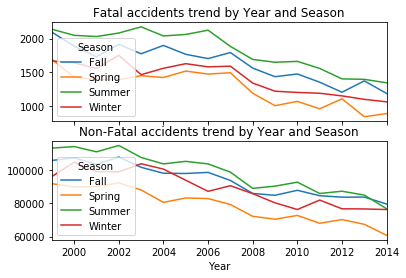

In [13]:
# Plot as a line graph using subplot to capture both severity type
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
df_sev1.plot(kind="line", ax=axes[0], title="Fatal accidents trend by Year and Season")
df_sev2.plot(kind="line", ax=axes[1], title="Non-Fatal accidents trend by Year and Season")
plt.xlabel("Year")

#### - Answer: Apparently, Summer is the most deadly season of the year

### Question 2 : How does Age and Sex affect accident severity?


In [14]:
# Get the dataframe of relevant columns
df_sex = df_new[["P_AGE", "P_SEX", "C_SEV"]].dropna()
df_sex.shape

(5426680, 3)

In [15]:
# find data range
df_sex.describe()

,P_AGE,C_SEV
count,5.426680e+06,5.426680e+06
mean,3.637552e+01,1.982670e+00
std,1.836858e+01,1.304989e-01
min,1.000000e+00,1.000000e+00
25%,2.100000e+01,2.000000e+00
50%,3.400000e+01,2.000000e+00
75%,4.900000e+01,2.000000e+00
max,9.900000e+01,2.000000e+00


In [16]:
# Create age band in new column called "Age Band" and drop the "P_AGE" column as it is no longer necessary
def get_age_band(age):
    """
    This function puts the passenger in the appropriate age band
    
    Bands are:
    - 0 - 14
    - 15 - 24
    - 25 - 34
    - 35 - 44
    - 45 - 54
    - 55 - 64
    - 65 - 74
    - 75 - 84
    - 85 - 99
    
    Input :
    - passenger's age as float
    
    Output:
    - Age band as a string
    
    """
    
    if (age > 0.0) & (age < 15.0):
        return "0 - 14"
    
    elif (age > 14.0) & (age < 25.0):
        return "15 - 24"
    
    elif (age > 24.0) & (age < 35.0):
        return "25 - 34"
    
    elif (age > 34.0) & (age < 45.0):
        return "35 - 44"
    
    elif (age > 44.0) & (age < 55.0):
        return "45 - 54"
    
    elif (age > 54.0) & (age < 65.0):
        return "55 - 64"
    
    elif (age > 64.0) & (age < 75.0):
        return "55 - 74"
    
    elif (age > 74.0) & (age < 85.0):
        return "75 - 84"
    
    else:
        return "85 - 99"
    
df_sex["Age Band"] = df_sex["P_AGE"].apply(get_age_band)
df_sex.drop("P_AGE", axis=1, inplace=True)


In [17]:
# Seperate dataset by Fatality severity where "1" indicates at least one fatality and "2" , a non-fatal injury
df_sex.rename(columns={"P_SEX" : "SEX"}, inplace=True)
df_sev1, df_sev2 = refine_dataset(df_sex, ["Age Band", "SEX"], True)

Text(0.5, 0, 'Age Band')

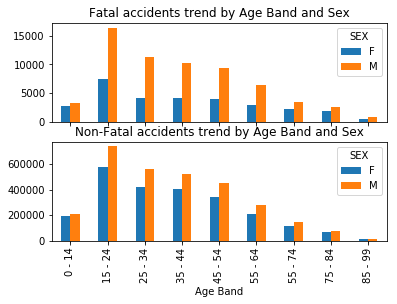

In [18]:
# Plot as a bar graph using subplot to capture both severity type
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
df_sev1.plot(kind="bar", ax=axes[0], title="Fatal accidents trend by Age Band and Sex")
df_sev2.plot(kind="bar", ax=axes[1], title="Non-Fatal accidents trend by Age Band and Sex")
plt.xlabel("Age Band")

#### - Answer: Yes, age band 15-24 are the most prone to accidents and generally males are involved in more accidents than females

### Question 3: What hours of the day and what days of the week are the deadliest?


In [19]:
# Get the dataframe of relevant columns
df_day = df_new[["C_WDAY", "C_HOUR", "C_SEV"]].dropna()
df_day.shape

(5800190, 3)

The deadliest hour for Fatal accidents is between 16:00 to 16:59
The deadliest hour for Non Fatal accidents is between 16:00 to 16:59


Text(0.5, 0, 'Hour')

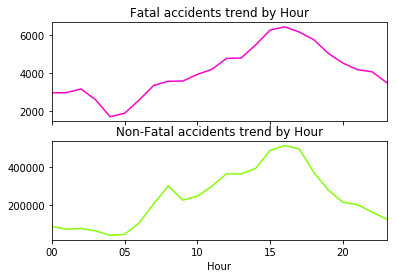

In [20]:
# Seperate dataset by Fatality severity where "1" indicates at least one fatality and "2" , a non-fatal injury
df_hour = df_day[["C_HOUR", "C_SEV"]]
df_sev1, df_sev2 = refine_dataset(df_hour, ["C_HOUR"], False)
df_sev1["Hour of Day"] = ["00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", 
                     "17", "18", "19", "20", "21", "22", "23"]
df_sev2["Hour of Day"] = ["00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", 
                     "17", "18", "19", "20", "21", "22", "23"]
df_sev1.set_index("Hour of Day", inplace=True)

ind1 = int(df_sev1["C_SEV"].idxmax())
ind2 = int(df_sev2["C_SEV"].idxmax())
print("The deadliest hour for Fatal accidents is between {}:00 to {}:59".format(ind1, ind1))
print("The deadliest hour for Non Fatal accidents is between {}:00 to {}:59".format(ind2, ind2))


# Plot as a line graph using subplot to capture both severity type
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
df_sev1.plot(kind="line", ax=axes[0], title="Fatal accidents trend by Hour", legend=False, color="#fc03ca")
df_sev2.plot(kind="line", ax=axes[1], title="Non-Fatal accidents trend by Hour", legend=False, color="#84fc03")
plt.xlabel("Hour")

The deadliest Week Day for Fatal accidents is Sat
The deadliest hour for Non Fatal accidents is Frid


Text(0.5, 0, 'Week Day')

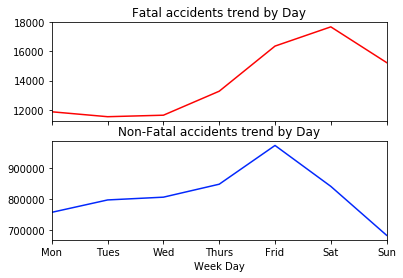

In [21]:
# Get relevant dataset and refine accordingly
df_wday = df_day[["C_WDAY", "C_SEV"]]
df_sev1, df_sev2 = refine_dataset(df_wday, ["C_WDAY"], False)


df_sev1["Week Day"] = ["Mon", "Tues", "Wed", "Thurs", "Frid", "Sat", "Sun"]
df_sev1.set_index('Week Day', inplace=True)
df_sev2["Week Day"] = ["Mon", "Tues", "Wed", "Thurs", "Frid", "Sat", "Sun"]
df_sev2.set_index('Week Day', inplace=True)

print("The deadliest Week Day for Fatal accidents is {}".format(df_sev1["C_SEV"].idxmax()))
print("The deadliest hour for Non Fatal accidents is {}".format(df_sev2["C_SEV"].idxmax()))

# Plot as a line graph using subplot to capture both severity type
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
df_sev1.plot(kind="line", ax=axes[0], title="Fatal accidents trend by Day", legend=False, color="#fc0303")
df_sev2.plot(kind="line", ax=axes[1], title="Non-Fatal accidents trend by Day", legend=False, color="#0328fc")
plt.xlabel("Week Day")
